In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Most_Streamed_Spotify_Songs_2024.csv', encoding='ISO-8859-1')

In [3]:
# Display the first few rows
print(df.head())

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [5]:
print(df.describe())

       Track Score  Spotify Popularity  Apple Music Playlist Count  \
count  4600.000000         3796.000000                  4039.00000   
mean     41.844043           63.501581                    54.60312   
std      38.543766           16.186438                    71.61227   
min      19.400000            1.000000                     1.00000   
25%      23.300000           61.000000                    10.00000   
50%      29.900000           67.000000                    28.00000   
75%      44.425000           73.000000                    70.00000   
max     725.400000           96.000000                   859.00000   

       Deezer Playlist Count  Amazon Playlist Count  TIDAL Popularity  \
count            3679.000000            3545.000000               0.0   
mean               32.310954              25.348942               NaN   
std                54.274538              25.989826               NaN   
min                 1.000000               1.000000               NaN   
25% 

In [6]:
df['Spotify Streams'] = pd.to_numeric(df['Spotify Streams'].str.replace(',','', regex=True), errors= 'coerce')
df['Spotify Playlist Count'] = pd.to_numeric(df['Spotify Playlist Count'].str.replace(',',''), errors= 'coerce')
df['YouTube Views'] = pd.to_numeric(df['YouTube Views'].str.replace(',',''), errors= 'coerce')
df['YouTube Likes'] = pd.to_numeric(df['YouTube Likes'].str.replace(',',''), errors= 'coerce')
df['TikTok Posts'] = pd.to_numeric(df['TikTok Posts'].str.replace(',',''), errors= 'coerce')
df['TikTok Likes'] = pd.to_numeric(df['TikTok Likes'].str.replace(',',''), errors= 'coerce')
df['TikTok Views'] = pd.to_numeric(df['TikTok Views'].str.replace(',',''), errors= 'coerce')
df['AirPlay Spins'] = pd.to_numeric(df['AirPlay Spins'].str.replace(',',''), errors= 'coerce')
df['SiriusXM Spins'] = pd.to_numeric(df['SiriusXM Spins'].str.replace(',',''), errors= 'coerce')
df['Pandora Streams'] = pd.to_numeric(df['Pandora Streams'].str.replace(',',''), errors= 'coerce')
df['Soundcloud Streams'] = pd.to_numeric(df['Soundcloud Streams'].str.replace(',',''), errors= 'coerce')
df['Shazam Counts'] = pd.to_numeric(df['Shazam Counts'].str.replace(',',''), errors= 'coerce')

In [7]:
#  Drop the 'TIDAL Popularity' column as it contains no data
df = df.drop(columns=['TIDAL Popularity'])

In [8]:
print(df.isnull().sum())    # Check for missing values

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
Explicit Track                   0
dtype: int64


In [9]:
# Handle missing values
# Drop rows where 'Spotify Streams is missing'
df = df.dropna(subset = ['Spotify Streams'])
df.fillna(0, inplace = True)   #Fill the missing values with 0

<ipython-input-9-b535fa84e850>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace = True)   #Fill the missing values with 0


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4487 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4487 non-null   object 
 1   Album Name                  4487 non-null   object 
 2   Artist                      4487 non-null   object 
 3   Release Date                4487 non-null   object 
 4   ISRC                        4487 non-null   object 
 5   All Time Rank               4487 non-null   object 
 6   Track Score                 4487 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4487 non-null   float64
 9   Spotify Playlist Reach      4487 non-null   object 
 10  Spotify Popularity          4487 non-null   float64
 11  YouTube Views               4487 non-null   float64
 12  YouTube Likes               4487 non-null   float64
 13  TikTok Posts                4487 non-n

In [11]:
top_10_spotify_tracks = df.nlargest(10, 'Spotify Streams')
print(top_10_spotify_tracks[['Track', 'Artist', 'Spotify Streams']])

                                              Track         Artist  \
55                                  Blinding Lights     The Weeknd   
4254                                Blinding Lights        xSyborg   
53                                     Shape of You     Ed Sheeran   
1637                                   Shape of You        xSyborg   
132                               Someone You Loved  Lewis Capaldi   
114   Sunflower - Spider-Man: Into the Spider-Verse    Post Malone   
19                                        As It Was   Harry Styles   
3406                                      As It Was   Harry Styles   
262                                         Starboy     The Weeknd   
519                                       One Dance          Drake   

      Spotify Streams  
55       4.281469e+09  
4254     4.261328e+09  
53       3.909459e+09  
1637     3.888356e+09  
132      3.427499e+09  
114      3.358704e+09  
19       3.301815e+09  
3406     3.299082e+09  
262      3.29

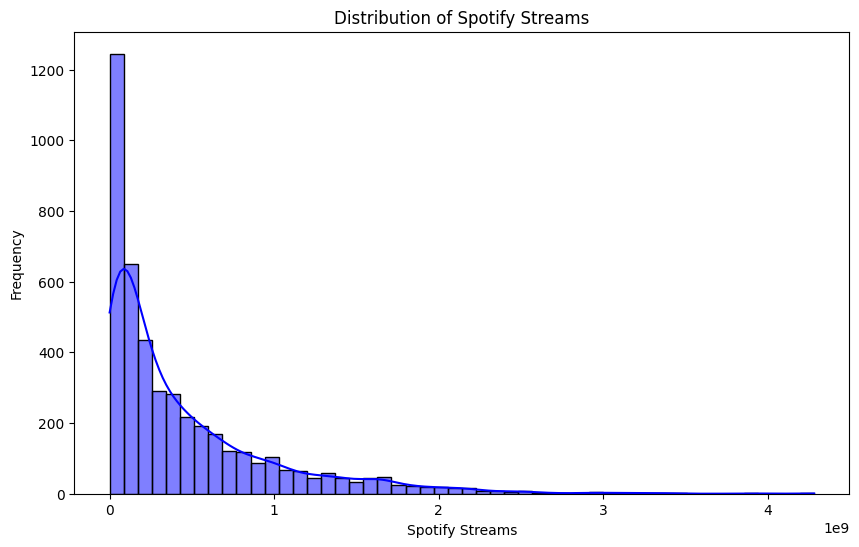

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Spotify Streams'], bins=50, kde=True, color='blue')
plt.title('Distribution of Spotify Streams')
plt.xlabel('Spotify Streams')
plt.ylabel('Frequency')
plt.show()

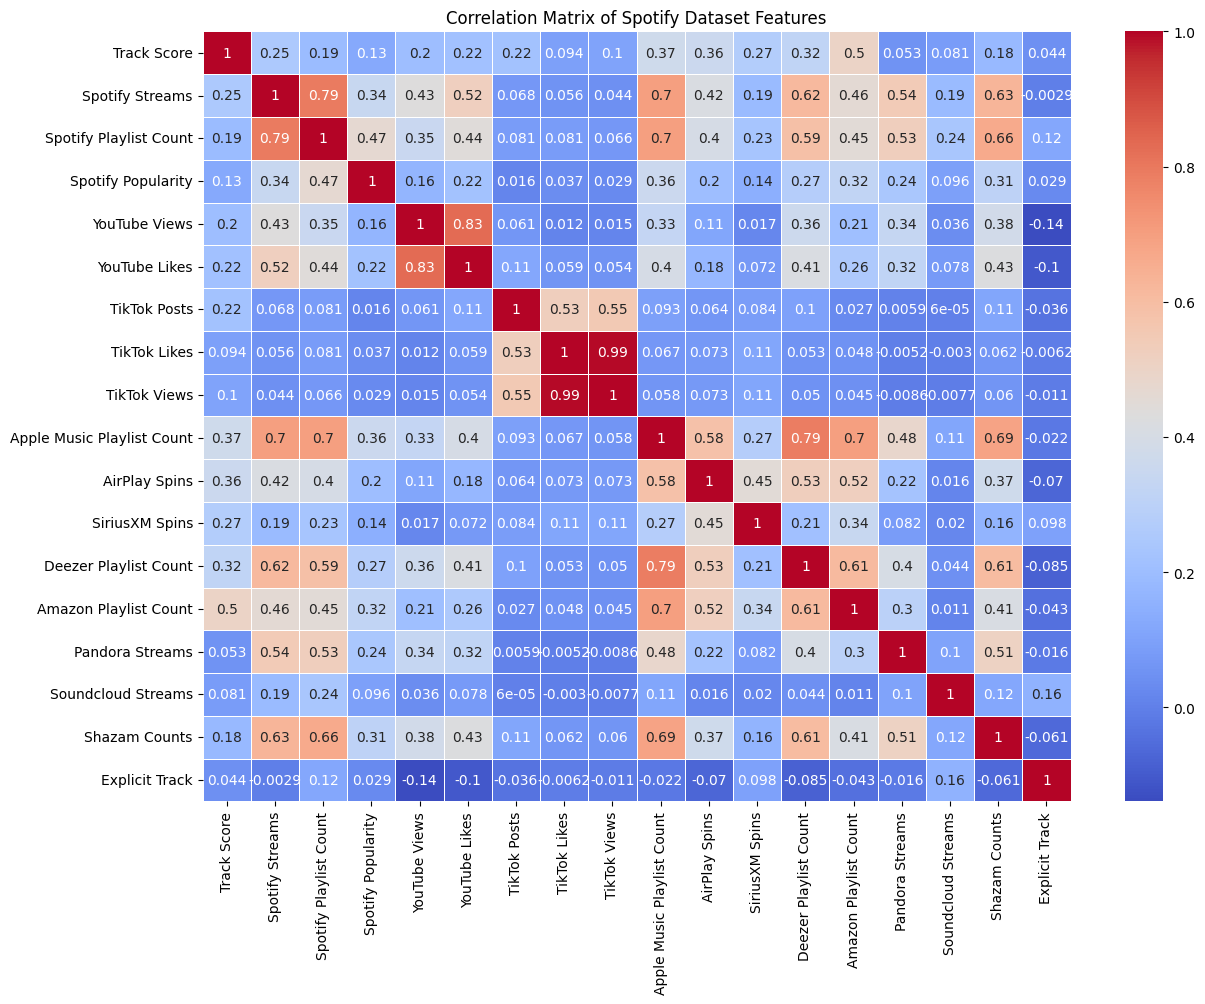

In [15]:
numeric_df = df.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Spotify Dataset Features')
plt.show()

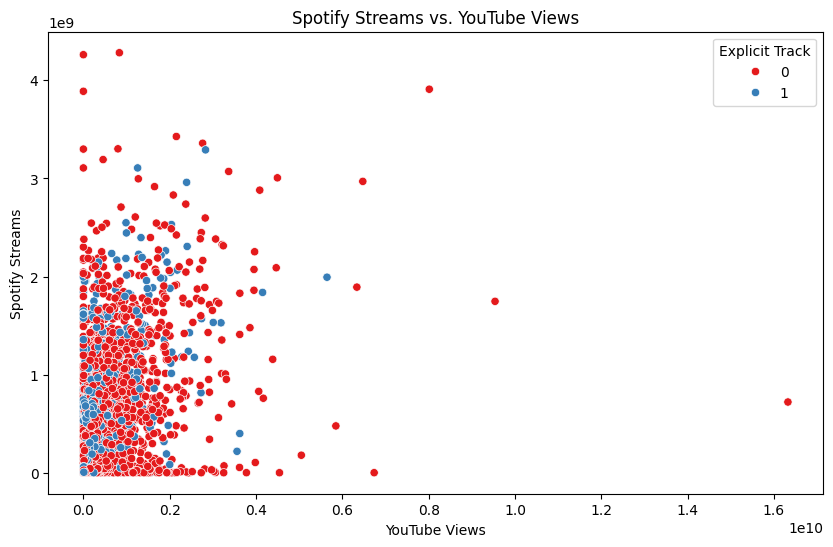

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='YouTube Views', y='Spotify Streams', hue='Explicit Track', palette ='Set1')
plt.title('Spotify Streams vs. YouTube Views')
plt.xlabel('YouTube Views')
plt.ylabel('Spotify Streams')
plt.show()

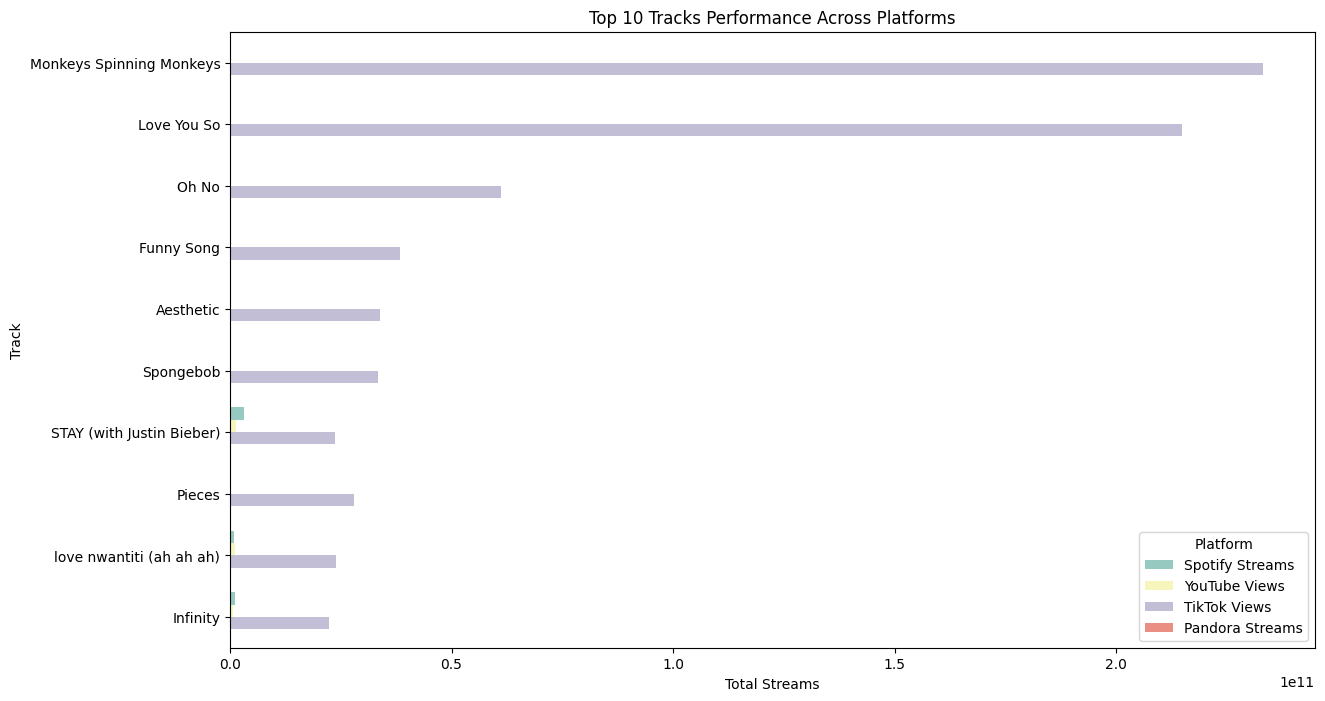

In [18]:
platforms = ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams']
df['Total Streams'] = df[platforms].sum(axis=1)
top_tracks = df.nlargest(10, 'Total Streams')

top_tracks_melted = top_tracks.melt(id_vars=['Track', 'Artist'], value_vars=platforms, var_name='Platform', value_name='Streams')
plt.figure(figsize=(14,8))
sns.barplot(x='Streams', y='Track', hue='Platform', data=top_tracks_melted, palette='Set3')
plt.title('Top 10 Tracks Performance Across Platforms')
plt.xlabel('Total Streams')
plt.ylabel('Track')
plt.show()